In [18]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
|import layer
layer.login()
layer.init("image-classification")

In [ ]:
! unzip /content/oil spill detection.v2-resize-640.tensorflow.zip

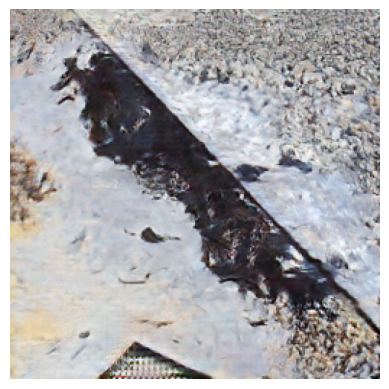

In [12]:
plt.imshow(Image.open("/content/train/USR_shadow_0022_fake_png.rf.a35f09f2467d5810571fb7166d72f182.jpg"))
plt.axis('off')
plt.show()

In [ ]:
base_dir = 'content/images'
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   validation_split=0.2
                                   )
validation_gen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [ ]:
image_size = (200, 200)
training_set = train_datagen.flow_from_directory(base_dir,
                                                 seed=101,
                                                 target_size=image_size,
                                                 batch_size=32,
                                                 subset = "training",
                                                 class_mode='categorical')

In [ ]:
validation_set = validation_gen.flow_from_directory(base_dir,
                                               target_size=image_size,
                                               batch_size=32,
                                               subset = "validation",
                                               class_mode='categorical')

In [19]:
model = Sequential([

    Conv2D(filters=32,kernel_size=(3,3),  input_shape = (200, 200, 3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(filters=32,kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(filters=64,kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(2, activation='sigmoid')
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 48, 48, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        1

In [ ]:
model.compile(optimizer='SGD',
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=[keras.metrics.CategoricalAccuracy()])

In [ ]:
callback = EarlyStopping(monitor='loss', patience=3)
history = model.fit(training_set,validation_data=validation_set, epochs=100,callbacks=[callback])

In [25]:
history = model.fit(training_set,validation_data=validation_set, epochs=epochs,callbacks=[callback])

Epoch 1/100
18/18 [==============================] - 2s 22ms/step - loss: 111761.8906 - accuracy: 0.7219 - val_loss: 280.9151 - val_accuracy: 0.0709
Epoch 2/100
18/18 [==============================] - 0s 7ms/step - loss: 4084.5815 - accuracy: 0.8093 - val_loss: 8280.4414 - val_accuracy: 0.9291
Epoch 3/100
18/18 [==============================] - 0s 9ms/step - loss: 2448.1841 - accuracy: 0.9091 - val_loss: 1002.1542 - val_accuracy: 0.9291
Epoch 4/100
18/18 [==============================] - 0s 8ms/step - loss: 728.0000 - accuracy: 0.8075 - val_loss: 6502.2749 - val_accuracy: 0.9291
Epoch 5/100
18/18 [==============================] - 0s 9ms/step - loss: 5393.3105 - accuracy: 0.9162 - val_loss: 12741.0586 - val_accuracy: 0.9291
Epoch 6/100
18/18 [==============================] - 0s 8ms/step - loss: 3318.8196 - accuracy: 0.7487 - val_loss: 5103.4204 - val_accuracy: 0.9291
Epoch 7/100
18/18 [==============================] - 0s 8ms/step - loss: 1067.7766 - accuracy: 0.9073 - val_loss: 13

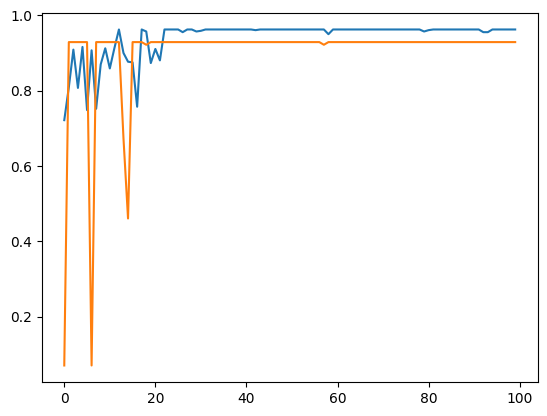

In [29]:
metrics_df = pd.DataFrame(history.history)
layer.log({"Metrics":metrics_df})
loss, accuracy = model.evaluate(validation_set)

metrics_df[["categorical_accuracy","val_categorical_accuracy"]].plot()
layer.log({"Accuracy plot":plt.gcf()})
plt.plot(a.history['accuracy'])
plt.plot(a.history['val_accuracy'])


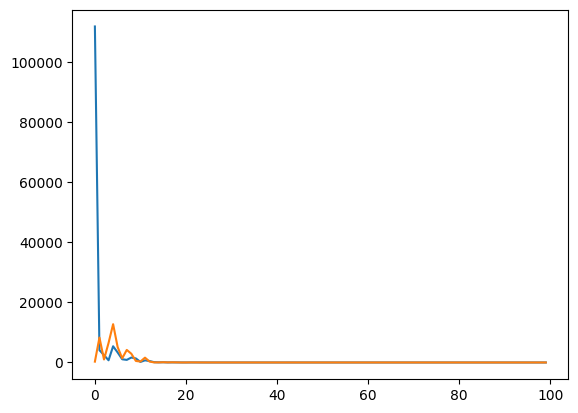

In [28]:
layer.log({"Accuracy on test dataset":accuracy})
metrics_df[["loss","val_loss"]].plot()
layer.log({"Loss plot":plt.gcf()})

In [31]:
from sklearn.metrics import accuracy_score
y_pred = np.argmax(model.predict(X_test), axis=1)
test_accuracy = accuracy_score(y_pred,y_test)
test_accuracy

8/8 [==============================] - 0s 2ms/step


0.9574468085106383

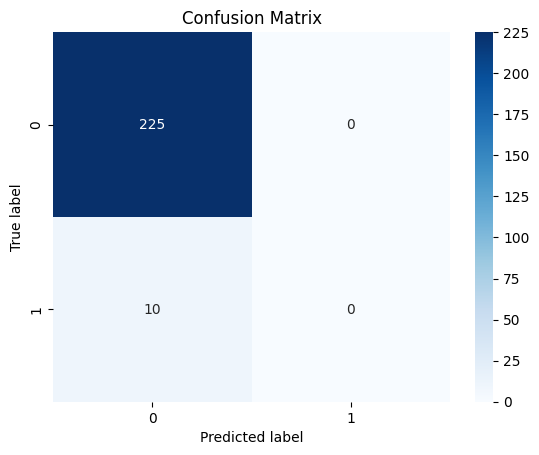

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()